# LEAD - LOGISTIC REGFRESSION ASSIGNMENT

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
lead = pd.read_csv("Leads.csv")


In [3]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead.shape

(9240, 37)

In [8]:
lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [9]:
lead.describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.97,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
97%,657466.940000,1.000000,11.000000,1660.000000,7.000000,17.000000,20.000000


In [10]:
lead.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9235    False
9236    False
9237    False
9238    False
9239    False
Length: 9240, dtype: bool

In [11]:
sum(lead.duplicated(subset = 'Prospect ID')) 

0

In [12]:
sum(lead.duplicated(subset = 'Lead Number')) 

0

In [13]:
lead.isna().sum(axis = 0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
lead = lead.replace('Select' , np.nan)
lead

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [15]:
lead.isna().sum().sort_values(ascending = False )

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [16]:
for v in lead.columns:
    print(lead[v].value_counts())
    print('/n' , '-'*20)

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
/n --------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
/n --------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
/n --------------------
Google               2868
Direct Traffic       254

In [17]:
lead = lead.drop(['Prospect ID', 'Country', 'Receive More Updates About Our Courses', 'Lead Quality', 
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
              'I agree to pay the amount through cheque','Magazine'], axis = 1 )

In [18]:
lead

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,...,No,No,Interested in other courses,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,...,No,No,Ringing,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,...,No,No,Will revert after reading the email,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,...,No,No,Ringing,NaN,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,...,No,No,Will revert after reading the email,NaN,02.Medium,01.High,15.0,18.0,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,...,No,No,Will revert after reading the email,Potential Lead,02.Medium,01.High,15.0,17.0,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,...,No,No,wrong number given,Potential Lead,02.Medium,01.High,14.0,19.0,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,...,No,No,invalid number,Potential Lead,02.Medium,01.High,13.0,20.0,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,...,No,No,NaN,NaN,02.Medium,02.Medium,15.0,16.0,No,SMS Sent


In [19]:
lead.shape

(9240, 28)

In [20]:
lead.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Digital Advertisement                               0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Search                      

In [21]:
lead['Tags'] = lead['Tags'].fillna(0)
lead['Asymmetrique Activity Index'] = lead['Asymmetrique Activity Index'].fillna(0)
lead['Asymmetrique Profile Index'] = lead['Asymmetrique Profile Index'].fillna(0)

In [22]:
lead.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Specialization                                   3380
What matters most to you in choosing a course    2709
What is your current occupation                  2690
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Tags                                                0
Asymmetrique Activity Index                         0
Lead Number                                         0
Digital Advertisement                               0
Asymmetrique Profile Index                          0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Search                      

In [23]:
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].fillna(0)
lead['Lead Profile'] = lead['Lead Profile'].fillna(0)
lead['Asymmetrique Profile Score'] = lead['Asymmetrique Profile Score'].fillna(0)
lead['Asymmetrique Activity Score'] = lead['Asymmetrique Activity Score'].fillna(0)
lead['Specialization'] = lead['Specialization'].fillna(0)
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna(0)
lead['What is your current occupation'] = lead['What is your current occupation'].fillna(0)
lead['Last Activity'] = lead['Last Activity'].fillna(0)
lead['Lead Source'] = lead['Lead Source'].fillna(0)

In [24]:
lead.isnull().sum().sort_values(ascending = False)

TotalVisits                                      137
Page Views Per Visit                             137
Lead Number                                        0
Newspaper Article                                  0
A free copy of Mastering The Interview             0
Asymmetrique Profile Score                         0
Asymmetrique Activity Score                        0
Asymmetrique Profile Index                         0
Asymmetrique Activity Index                        0
Lead Profile                                       0
Tags                                               0
Through Recommendations                            0
Digital Advertisement                              0
Newspaper                                          0
X Education Forums                                 0
Search                                             0
Lead Origin                                        0
What matters most to you in choosing a course      0
What is your current occupation               

In [25]:
lead['TotalVisits'] = lead['TotalVisits'].fillna(lead['TotalVisits'].mean())
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna((lead['Page Views Per Visit'].mean()))

In [26]:
lead

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,...,No,No,Interested in other courses,0,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,...,No,No,Ringing,0,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,...,No,No,Will revert after reading the email,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,...,No,No,Ringing,0,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,...,No,No,Will revert after reading the email,0,02.Medium,01.High,15.0,18.0,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,...,No,No,Will revert after reading the email,Potential Lead,02.Medium,01.High,15.0,17.0,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,...,No,No,wrong number given,Potential Lead,02.Medium,01.High,14.0,19.0,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,...,No,No,invalid number,Potential Lead,02.Medium,01.High,13.0,20.0,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,...,No,No,0,0,02.Medium,02.Medium,15.0,16.0,No,SMS Sent


In [27]:
lead.shape

(9240, 28)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


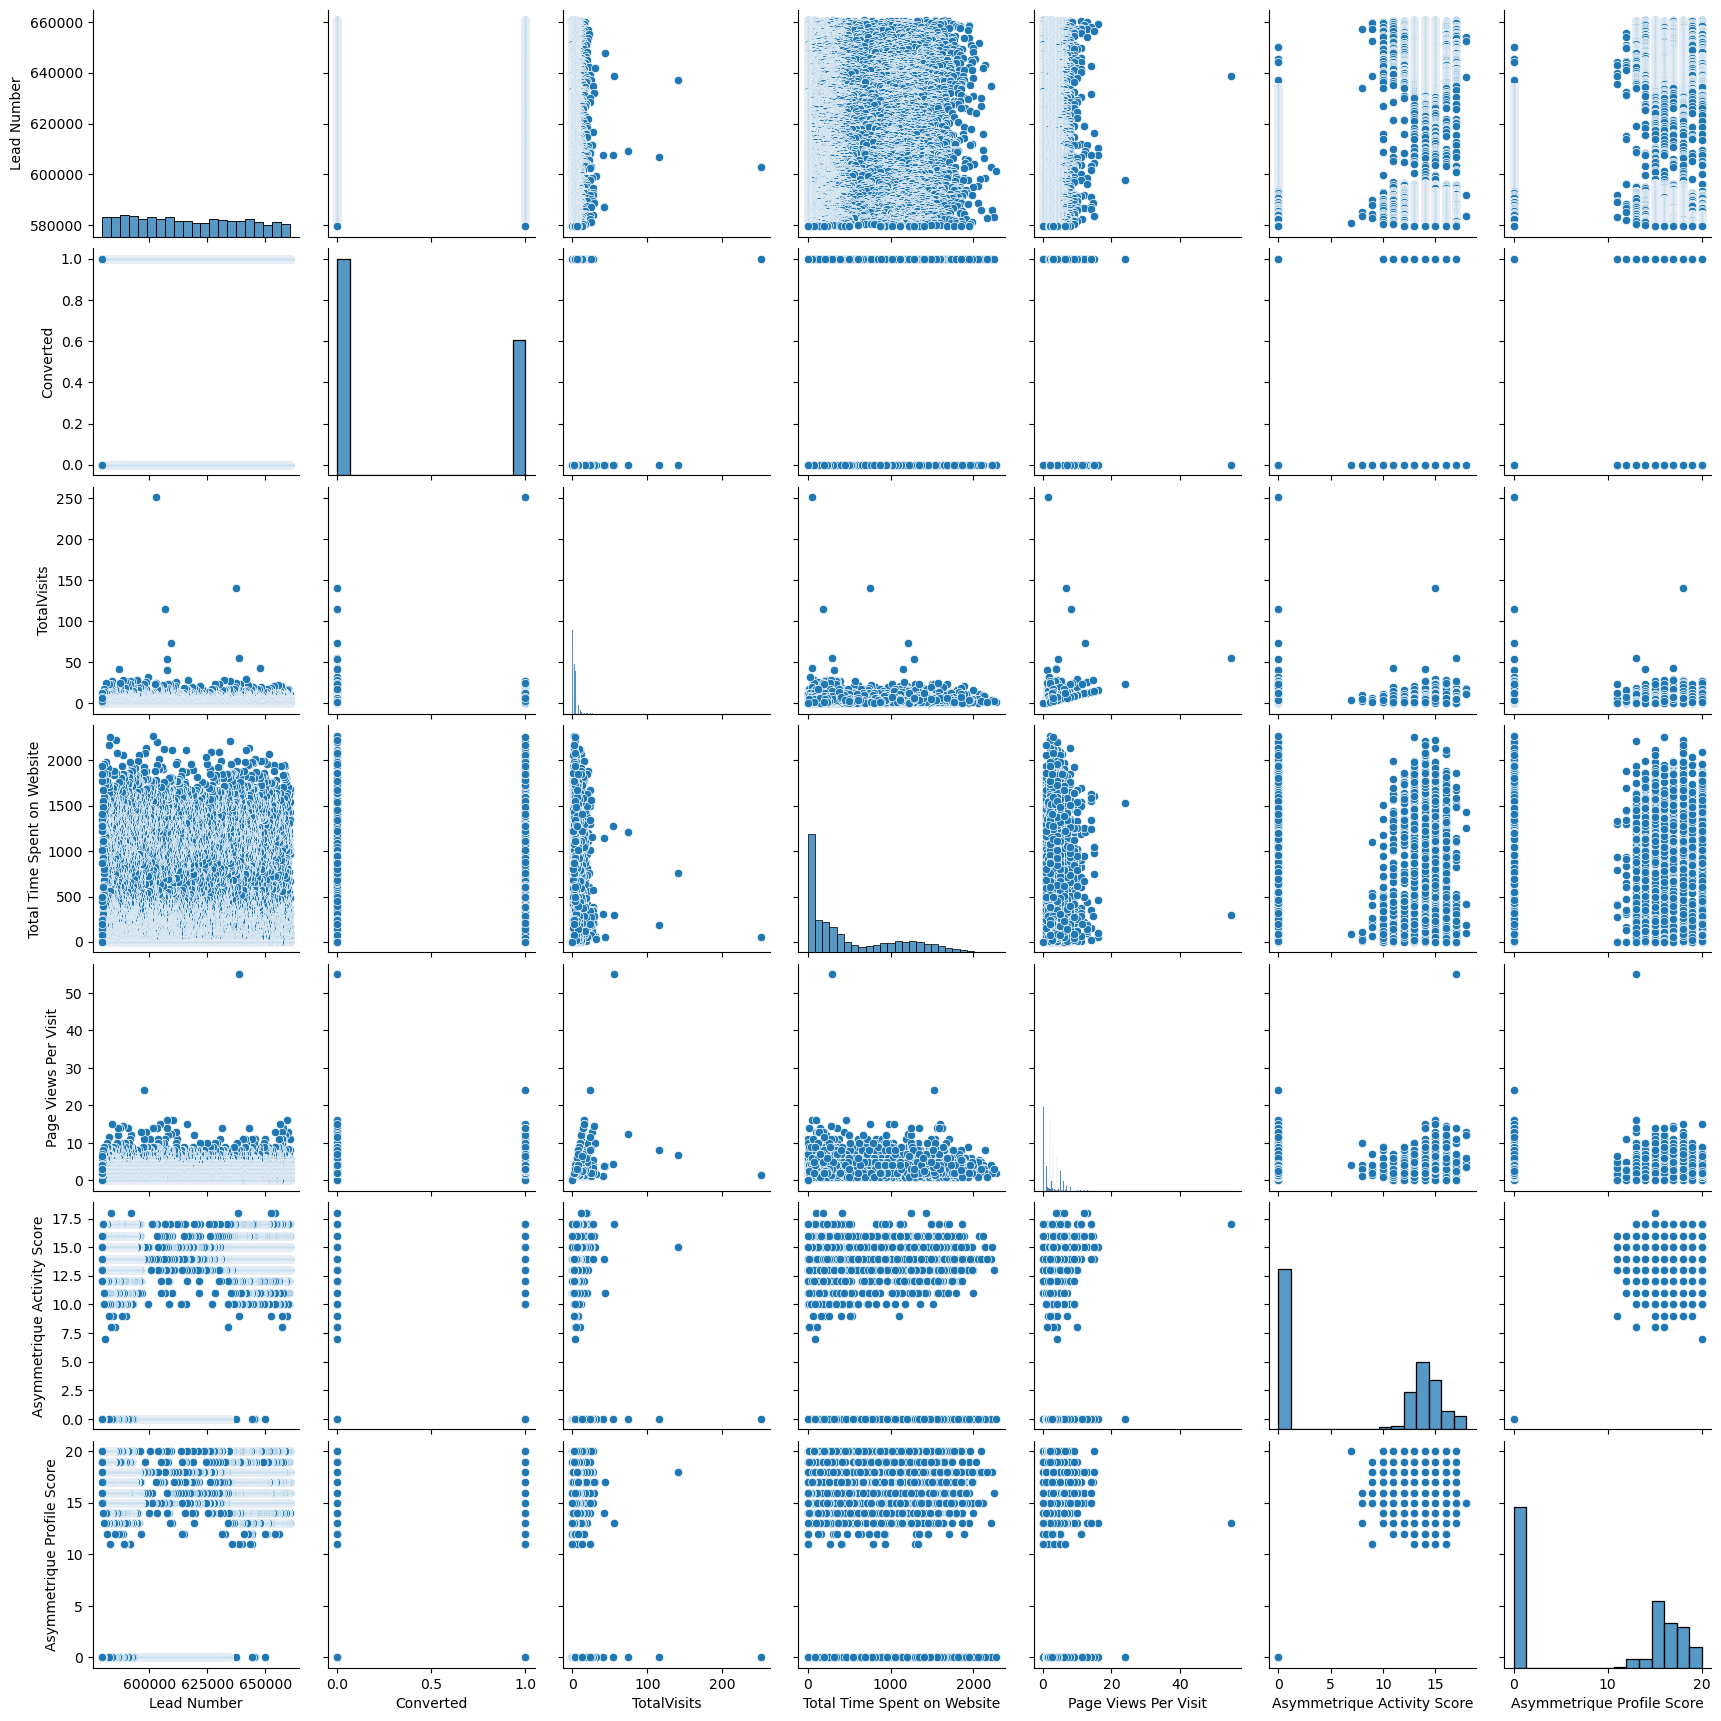

In [29]:
sns.pairplot(lead)

<Axes: xlabel='count', ylabel='Lead Origin'>

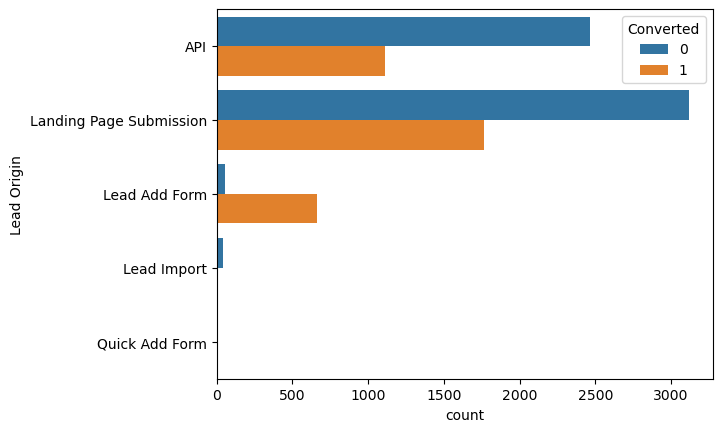

In [30]:

sns.countplot(y="Lead Origin", hue="Converted", data=lead) 

<Axes: xlabel='count', ylabel='Lead Source'>

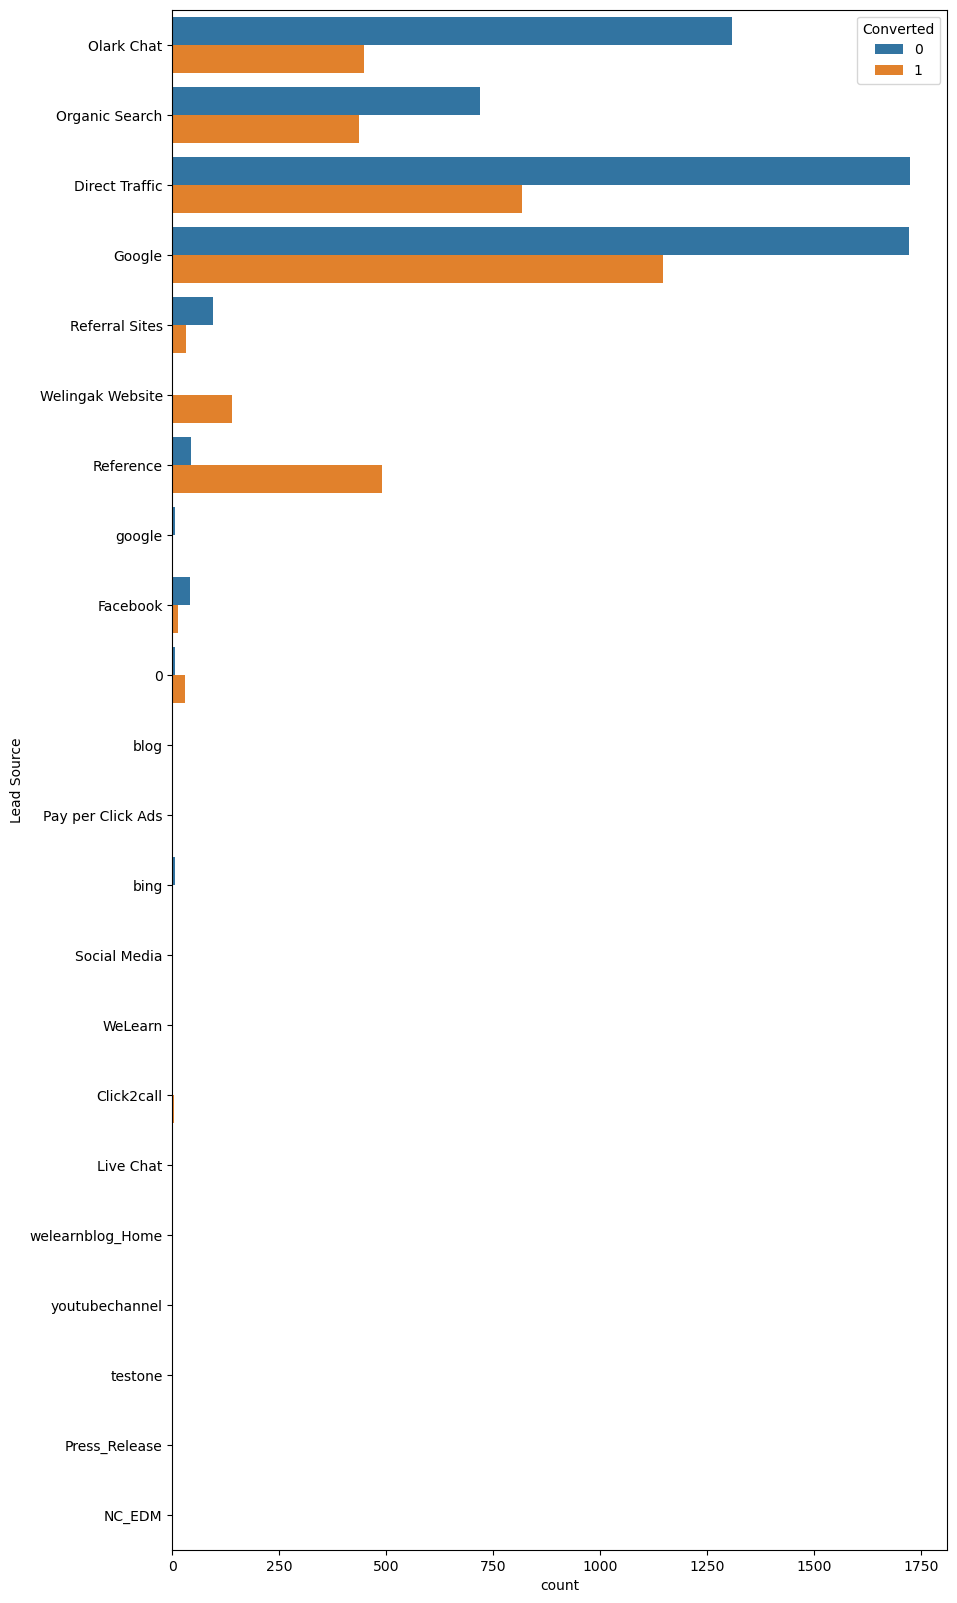

In [31]:
plt.figure(figsize=(10, 20))
sns.countplot(y="Lead Source", hue="Converted", data=lead)

<Axes: xlabel='count', ylabel='Tags'>

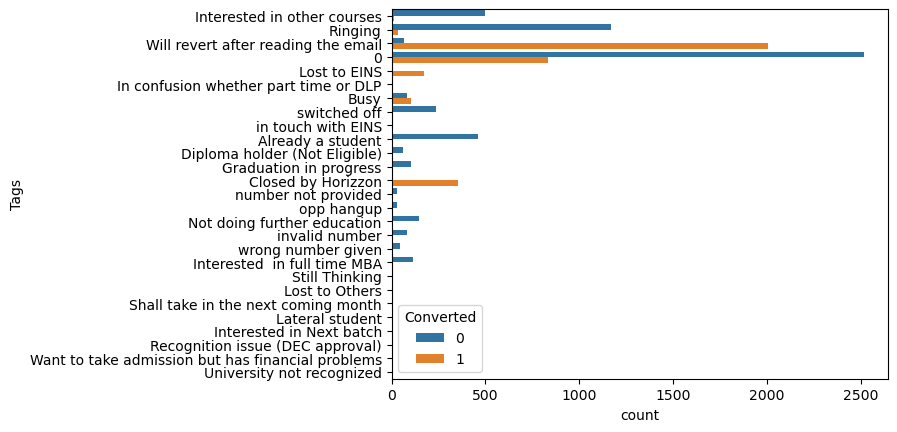

In [32]:

sns.countplot(y="Tags", hue="Converted", data=lead)

<Axes: xlabel='count', ylabel='Last Activity'>

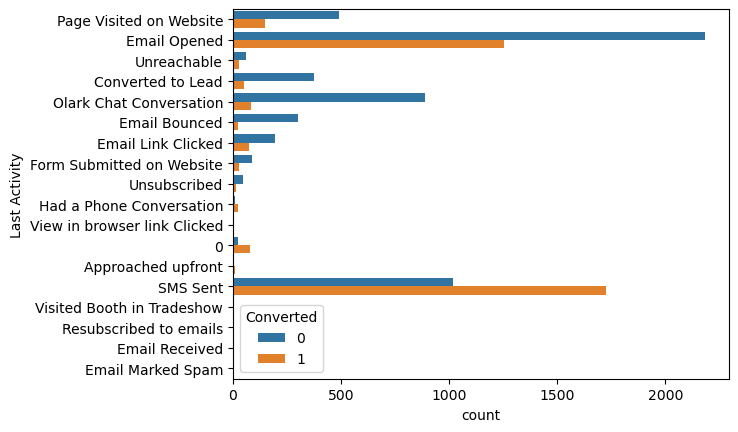

In [33]:
sns.countplot(y="Last Activity", hue="Converted", data=lead)

<Axes: xlabel='count', ylabel='Asymmetrique Activity Index'>

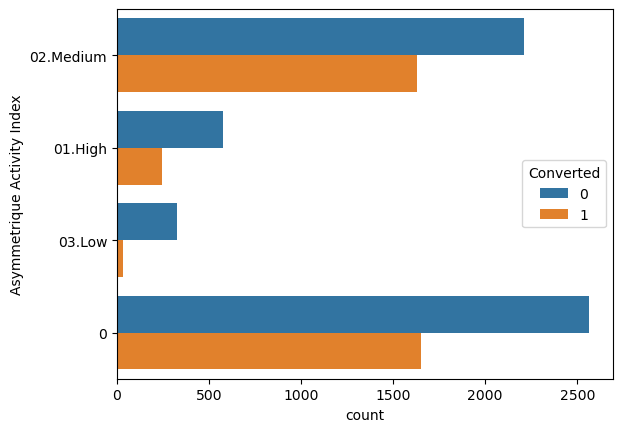

In [34]:
sns.countplot(y="Asymmetrique Activity Index", hue="Converted", data=lead)

<Axes: xlabel='count', ylabel='Asymmetrique Profile Index'>

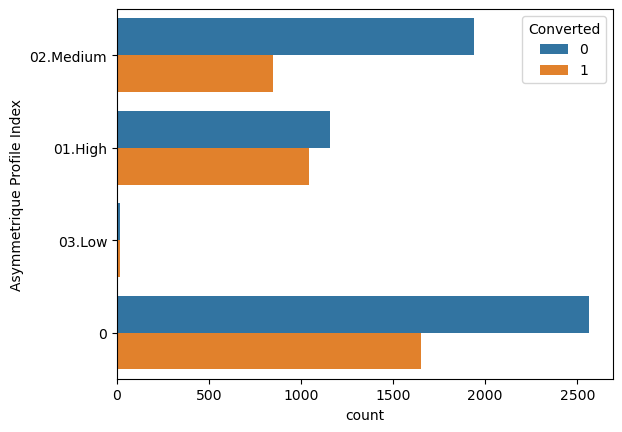

In [35]:
sns.countplot(y="Asymmetrique Profile Index", hue="Converted", data=lead)

<Axes: xlabel='count', ylabel='Asymmetrique Activity Score'>

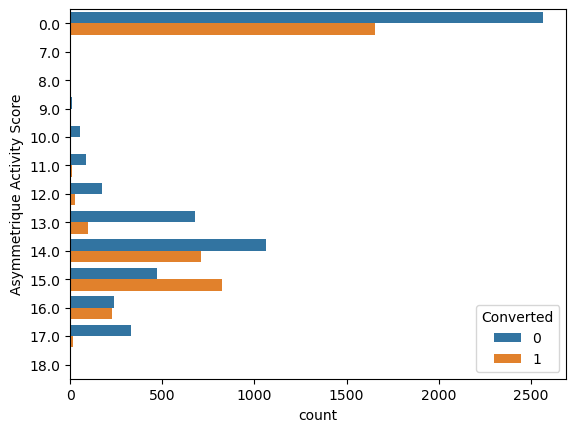

In [36]:
sns.countplot(y="Asymmetrique Activity Score", hue="Converted", data=lead)

<Axes: xlabel='Asymmetrique Profile Score', ylabel='count'>

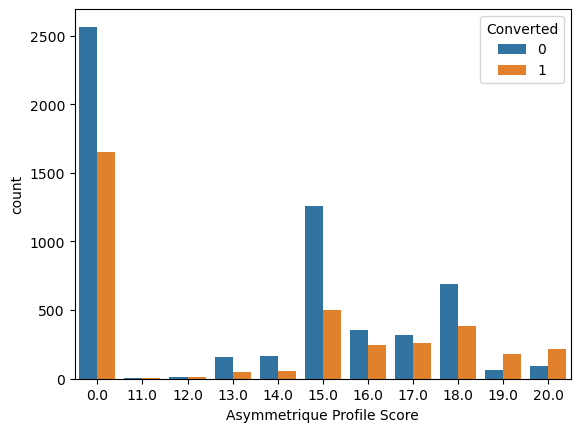

In [37]:
sns.countplot(x = "Asymmetrique Profile Score" ,hue = "Converted" , data = lead)

<Axes: xlabel='A free copy of Mastering The Interview', ylabel='count'>

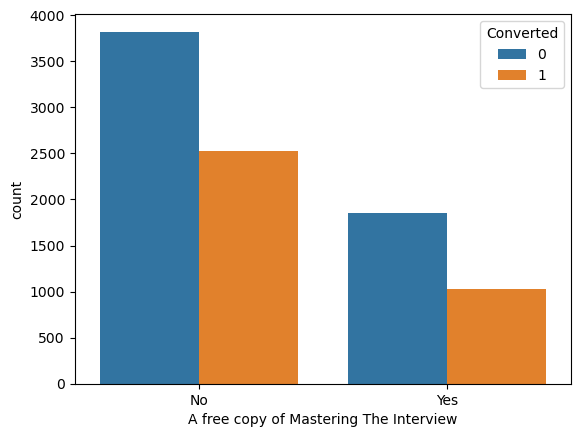

In [38]:
sns.countplot(x = "A free copy of Mastering The Interview" , hue = "Converted" , data = lead)

<Axes: xlabel='count', ylabel='Last Notable Activity'>

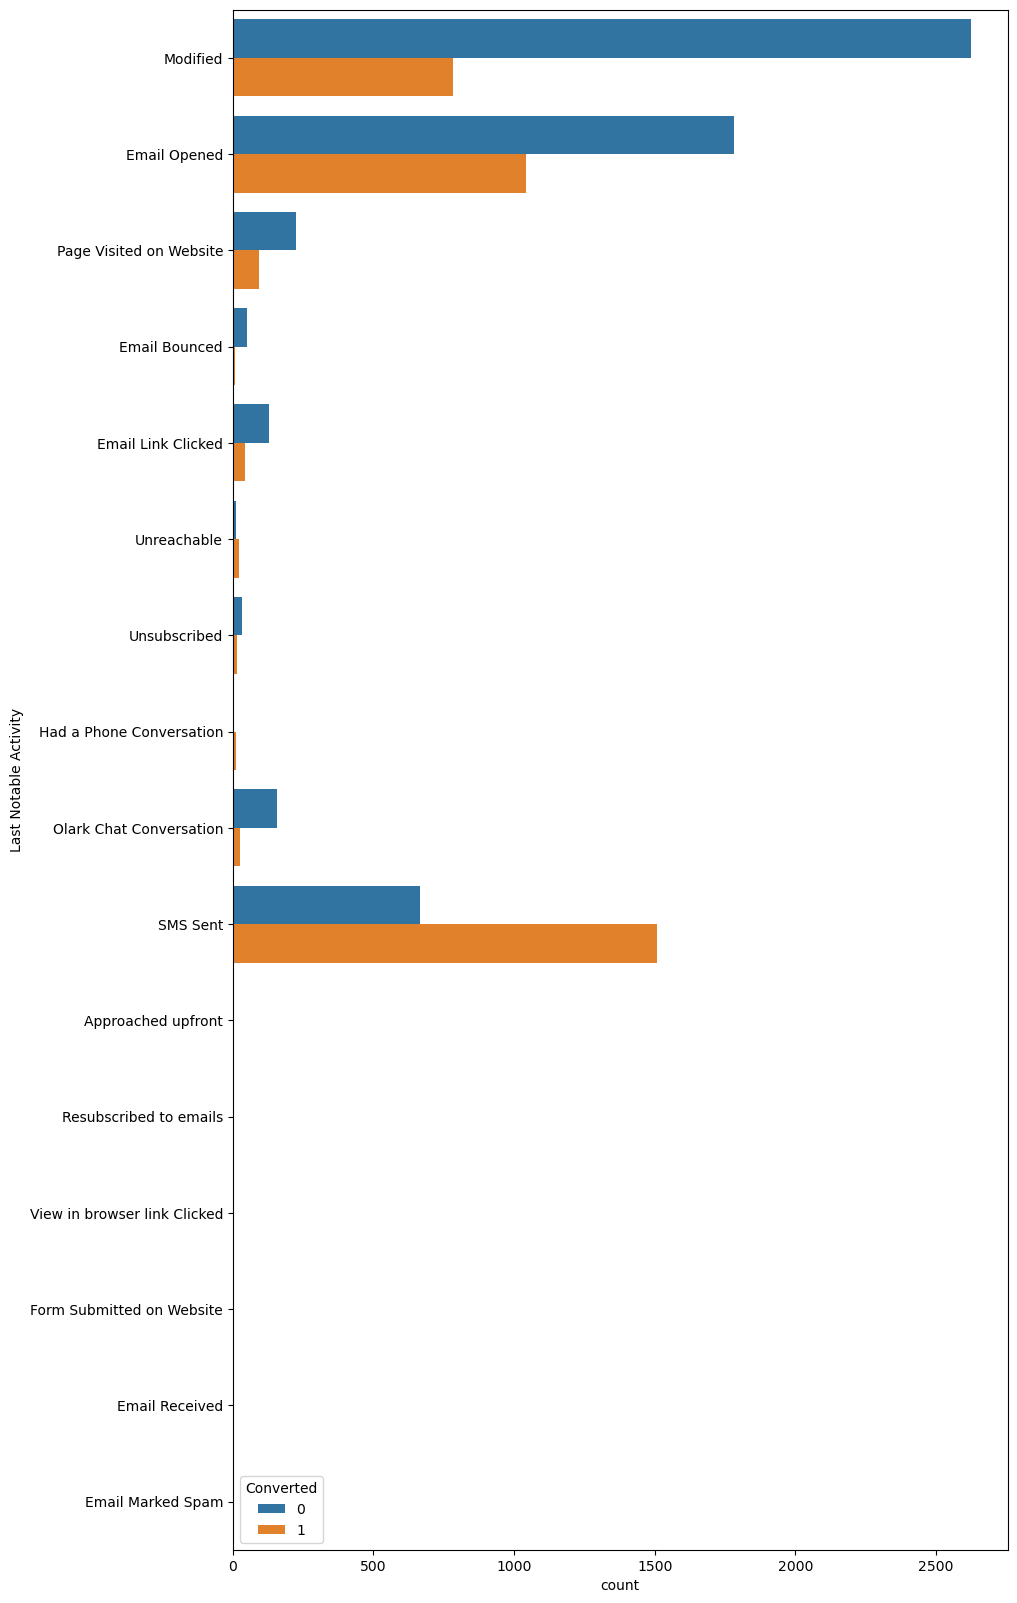

In [39]:
plt.figure(figsize = (10,20))
sns.countplot(y = "Last Notable Activity" , hue = "Converted" , data = lead)

<Axes: xlabel='Digital Advertisement', ylabel='count'>

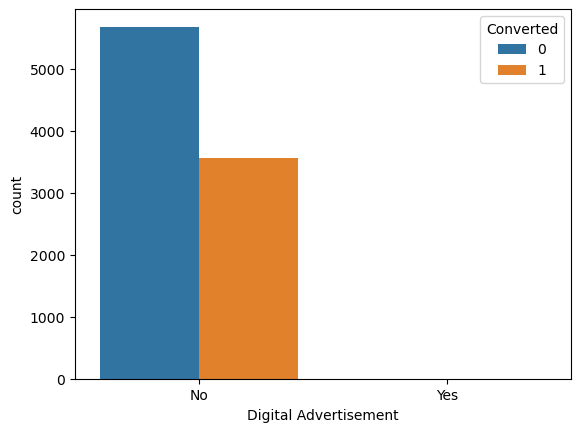

In [40]:
sns.countplot(x = "Digital Advertisement" , hue = "Converted", data = lead )

In [41]:
lead["Through Recommendations"] = lead["Through Recommendations"].map({"Yes":1,"No":0})


In [42]:
lead["Do Not Email"] = lead["Do Not Email"].map({"Yes":1,"No":0})

In [43]:
lead["Do Not Call"] = lead["Do Not Call"].map({"Yes":1,"No":0})

In [44]:
lead["Search"] = lead["Search"].map({"Yes":1,"No":0})

In [45]:
lead["Newspaper Article"] = lead["Newspaper Article"].map({"Yes":1,"No":0})

In [46]:
lead["X Education Forums"] = lead["X Education Forums"].map({"Yes":1, "No":0})

In [47]:
lead["Newspaper"] = lead["Newspaper"].map({"Yes":1, "No":0})

In [48]:
lead["Digital Advertisement"] = lead["Digital Advertisement"].map({"Yes":1, "No":0})

In [49]:
lead["A free copy of Mastering The Interview"] = lead["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

In [50]:
lead.head(10)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,Interested in other courses,0,02.Medium,02.Medium,15.0,15.0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,Ringing,0,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,Will revert after reading the email,Potential Lead,02.Medium,01.High,14.0,20.0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,Ringing,0,02.Medium,01.High,13.0,17.0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,Will revert after reading the email,0,02.Medium,01.High,15.0,18.0,0,Modified
5,660680,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,...,0,0,0,0,01.High,02.Medium,17.0,15.0,0,Modified
6,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,...,0,0,Will revert after reading the email,Potential Lead,02.Medium,01.High,14.0,20.0,0,Modified
7,660664,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,...,0,0,0,0,02.Medium,02.Medium,15.0,15.0,0,Modified
8,660624,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,...,0,0,0,0,02.Medium,02.Medium,14.0,14.0,1,Email Opened
9,660616,API,Google,0,0,0,4.0,58,4.0,Email Opened,...,0,0,0,0,02.Medium,02.Medium,13.0,16.0,0,Email Opened


In [51]:
lead.dtypes

Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                       int64
Do Not Call                                        int64
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                             int64
Newspaper Article                                  int64
X Education Forums                                 int64
Newspaper                      

In [52]:
lead['Converted'].value_counts()*100/len(lead)

0    61.461039
1    38.538961
Name: Converted, dtype: float64

In [53]:
#splitting
target = lead.Converted
feature =lead.drop('Converted', axis=1)

In [54]:
target.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
feature.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Tags,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,...,0,0,Interested in other courses,0,02.Medium,02.Medium,15.0,15.0,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,...,0,0,Ringing,0,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,Will revert after reading the email,Potential Lead,02.Medium,01.High,14.0,20.0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,Ringing,0,02.Medium,01.High,13.0,17.0,0,Modified
4,660681,Landing Page Submission,Google,0,0,2.0,1428,1.0,Converted to Lead,0,...,0,0,Will revert after reading the email,0,02.Medium,01.High,15.0,18.0,0,Modified


In [56]:

feature = pd.get_dummies(feature,drop_first=True)
feature.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [57]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target)

In [58]:
feature_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6930 entries, 5947 to 5547
Columns: 145 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: float64(4), int64(11), uint8(130)
memory usage: 1.7 MB


In [59]:
model = LogisticRegression()

In [60]:
feature_train.head(10)

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5947,604214,0,0,2.0,1302,2.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6435,600639,0,0,9.0,1475,3.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7750,590388,0,0,4.0,300,2.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8812,582634,0,0,2.0,1124,2.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4722,614563,1,0,8.0,170,4.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7819,589816,0,0,0.0,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2193,638583,0,0,0.0,0,0.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4377,617791,0,0,5.0,582,5.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8738,583135,0,0,3.0,828,3.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5901,604620,0,0,16.0,248,5.33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
model.fit(feature_train, target_train)

LogisticRegression()

In [62]:
prediction = model.predict(feature_test)

In [63]:
prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
predictions2 = model.predict_proba(feature_test)
predictions2

array([[0.63974983, 0.36025017],
       [0.2913686 , 0.7086314 ],
       [0.63728608, 0.36271392],
       ...,
       [0.77845497, 0.22154503],
       [0.75220215, 0.24779785],
       [0.64353557, 0.35646443]])

In [65]:
(confusion_matrix(target_test,prediction))

array([[1194,  203],
       [ 453,  460]], dtype=int64)

In [66]:
print(confusion_matrix(target_test,prediction))
print(accuracy_score(target_test,prediction))

[[1194  203]
 [ 453  460]]
0.716017316017316


In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(target_test, prediction))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78      1397
           1       0.69      0.50      0.58       913

    accuracy                           0.72      2310
   macro avg       0.71      0.68      0.68      2310
weighted avg       0.71      0.72      0.71      2310



In [69]:
from sklearn.metrics import roc_curve

Text(0, 0.5, 'True Positive Rate')

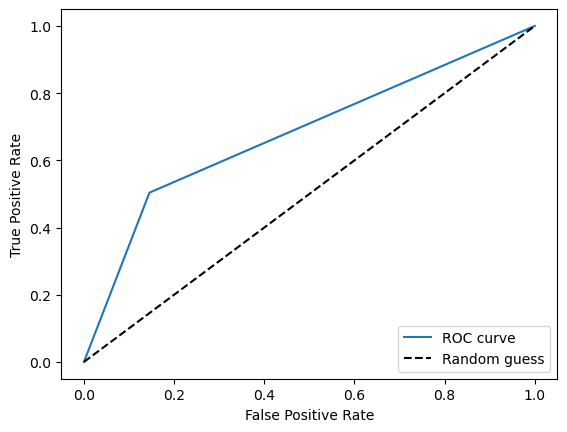

In [70]:
fpr, tpr, thresholds = roc_curve(target_test,prediction)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')